Create a contour plot in python which scans through x-axis (domestic renewable share) and y-axis (hydrogen export volume).  In the z-axis there is a synergy/conflict indicator called domestic average system costs

In [2]:
OUTPUT='/mnt/c/Users/scl38887/Documents/git/aldehyde/results/' #fix_co2/graphics/integrated_comp/'

### Real data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Get the data
data = pd.read_csv('/mnt/c/Users/scl38887/Documents/git/aldehyde/results/fix_co2/integrated_comp/stats.csv')


In [4]:

# Prepare the data
# Extract the Co2L which is in position 5-8
data["opts"] = data["opts"].str[4:]

#Rescale the cost from euro to B€
data["cost"] = (data["cost"]/1e9)

# Round the data
to_round = ["cost", "lcoh", "lcoh_marginal", "lcoh_marginal_export", "lcoh_marginal_weighted", "lcoe_marginal"]
to_ = ["cost", "lcoh", "lcoh_marginal", "lcoh_marginal_export", "lcoh_marginal_weighted", "lcoe_marginal"]

data[to_round] = data[to_round].round(2)

In [5]:
# Filter the data to remove 0 export and 0 co2 reduction
data = data[(data["h2export"] != 0) & (data["opts"] != "1.0")]

In [6]:
data.head(15)

,h2export,opts,cost,lcoh,lcoh_marginal,lcoh_marginal_export,lcoe_marginal,lcoh_marginal_weighted
12,20,0.90,6.52,49.35,56.97,55.55,35.33,45.83
13,40,0.90,7.63,52.39,57.04,55.61,35.37,48.77
14,60,0.90,8.75,53.48,57.66,55.91,36.24,44.98
15,80,0.90,9.87,54.08,57.59,56.13,36.30,44.22
16,100,0.90,10.99,54.48,57.69,56.18,36.39,45.57
17,120,0.90,12.12,54.74,57.77,56.21,36.48,45.52
18,140,0.90,13.24,54.94,58.16,56.25,36.77,46.21
19,160,0.90,14.42,55.40,59.35,60.02,37.50,48.52
20,180,0.90,15.64,56.01,60.74,62.07,38.41,45.66
21,200,0.90,16.89,56.62,61.02,62.41,38.60,46.61


In [7]:
# Shape the data in a way that is suitable for contour plotting
# First, get the unique values of the two parameters
h2export = np.unique(data['h2export'])
opts = np.unique(data['opts'].fillna(100).astype(float))
# Then, create a meshgrid of the two parameters
#X, Y = np.meshgrid(x, y) # Not necessary

In [8]:
# Reshape the data for all columns in to_round and save it in data dictionary
data_reshaped = {}
for i in to_round:
    data_reshaped[i] = data[i].values.reshape(len(opts), len(h2export)).T

In [9]:
# Turn "limit" to "reduction" (e.g. Co2L0.90 means 10% reduction)
opts_reverse = 1-opts

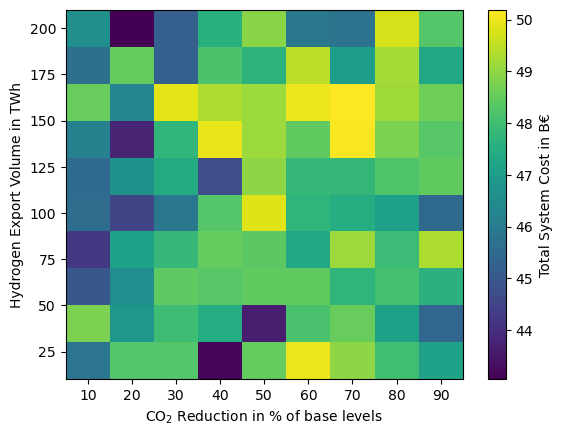

In [11]:
# Plot a contour plot of the data having the y-axis the column "h2export", x-axis the column "sopts", and the z-axis the column "cost"
levels = 10
#plt.contourf(opts_reverse*100,h2export,np.flip(data_reshaped["lcoh_marginal_export"], axis=1), levels=levels)
#plt.imshow(data_reshaped["lcoh_marginal_export"])
plt.pcolormesh(opts_reverse*100,h2export,np.flip(data_reshaped["lcoh_marginal_weighted"], axis=1))
plt.xlabel('CO$_2$ Reduction in % of base levels')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.colorbar().set_label('Total System Cost in B€')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_totalsystemcost_levels'+ str(levels) + '.pdf', bbox_inches='tight')

plt.show()

In [ ]:
# Plot a contour plot of the data having the y-axis the column "h2export", x-axis the column "sopts", and the z-axis the column "lcoh"
levels = 10
plt.contourf(opts_reverse*100,h2export,np.flip(lcoh, axis=1), levels=levels)

plt.xlabel('CO$_2$ Reduction in % of base levels')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.colorbar().set_label('LCOH in €/MWh')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_lcoh_levels'+ str(levels) + '.pdf', bbox_inches='tight')

plt.show()

### Dummy data: Single plot

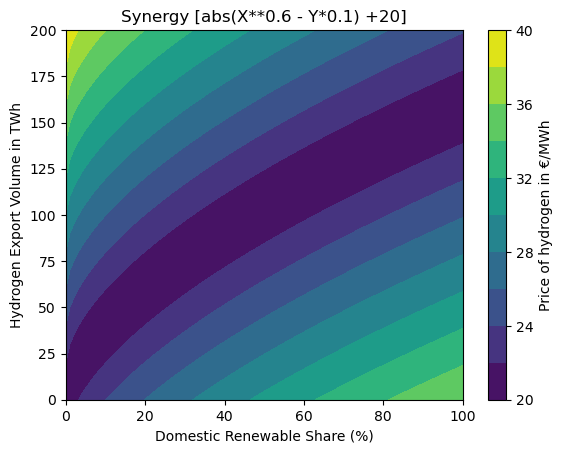

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y axis data
x = np.linspace(0, 100, num=100)
y = np.linspace(0, 200, num=100)

# Generate grid for x and y data
X, Y = np.meshgrid(x, y)

# Define the z-axis data, this is just a dummy example
Z = abs(X**0.6 - Y*0.1) +20

# Plot the contour plot
plt.contourf(X, Y, Z, levels=10)
plt.xlabel('Domestic Renewable Share (%)')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.title('Synergy [abs(X**0.6 - Y*0.1) +20]')
plt.colorbar().set_label('Price of hydrogen in €/MWh')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_dummy.pdf', bbox_inches='tight')

plt.show()


### Dummay Data: Subplots

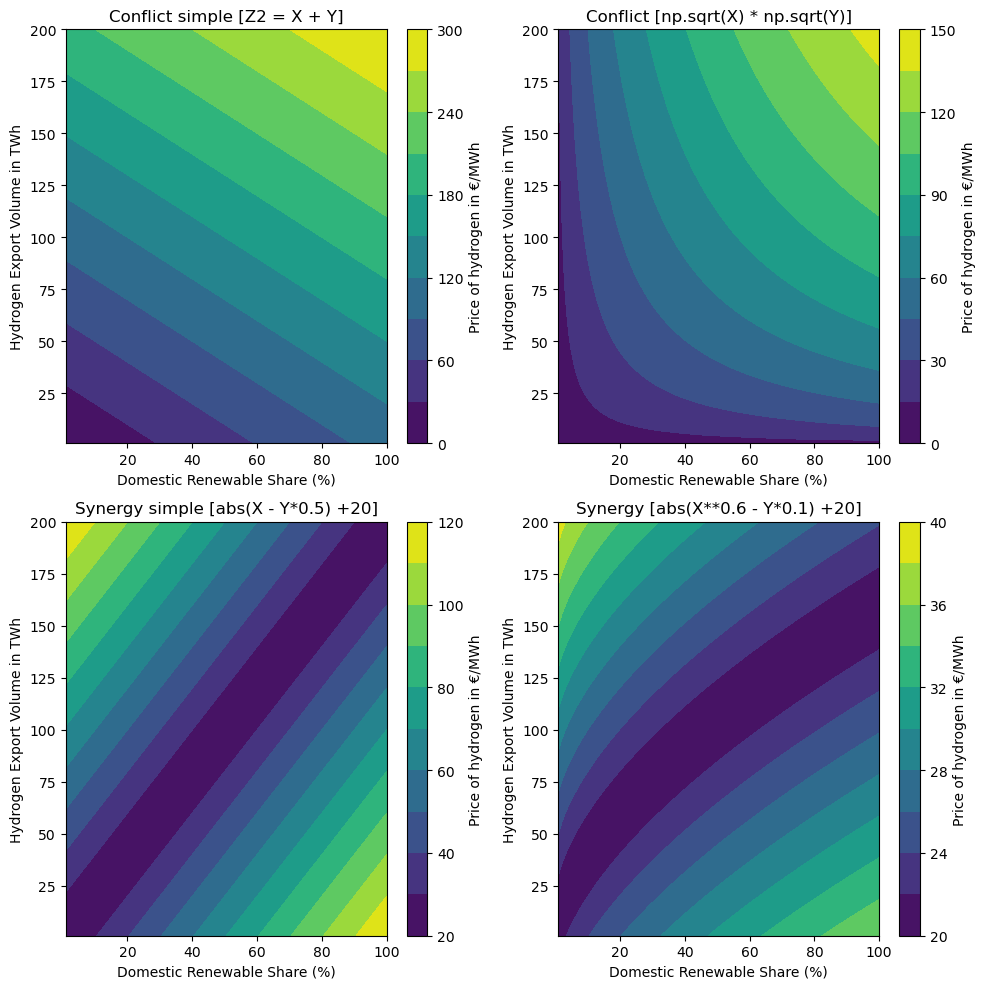

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y axis data. Start from 1 to avoid devision by zero
x = np.linspace(1, 100, num=100)
y = np.linspace(1, 200, num=100)

# Generate grid for x and y data
X, Y = np.meshgrid(x, y)

# Define the z-axis data, this is just a dummy example
Z1 = X + Y 
Z2 = np.sqrt(X) * np.sqrt(Y) 
Z3 = abs(X - Y*0.5) +20
Z4 = abs(X**0.6 - Y*0.1) +20

# Plot the 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
cax1 = axs[0, 0].contourf(X, Y, Z1, levels=10)
axs[0, 0].set_title('Conflict simple [Z2 = X + Y]')
cax2 = axs[0, 1].contourf(X, Y, Z2, levels=10)
axs[0, 1].set_title('Conflict [np.sqrt(X) * np.sqrt(Y)]')
cax3 = axs[1, 0].contourf(X, Y, Z3, levels=10)
axs[1, 0].set_title('Synergy simple [abs(X - Y*0.5) +20]')
cax4 = axs[1, 1].contourf(X, Y, Z4, levels=10)
axs[1, 1].set_title('Synergy [abs(X**0.6 - Y*0.1) +20]')

# Add colorbars
fig.colorbar(cax1, ax=axs[0, 0]).set_label('Price of hydrogen in €/MWh')
fig.colorbar(cax2, ax=axs[0, 1]).set_label('Price of hydrogen in €/MWh')
fig.colorbar(cax3, ax=axs[1, 0]).set_label('Price of hydrogen in €/MWh')
fig.colorbar(cax4, ax=axs[1, 1]).set_label('Price of hydrogen in €/MWh')

for ax in axs.flat:
    ax.set(xlabel='Domestic Renewable Share (%)', ylabel='Hydrogen Export Volume in TWh')

plt.tight_layout()
plt.savefig(OUTPUT+'contour_plot_dummy_subplots.pdf')
plt.show()
